In [61]:
#import required libraries
import numpy as np
import pandas
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from scipy import optimize
import pickle

In [62]:
#locate dirtory of data set
DIR='D:\SIH\Plant_Disease\Plant_pathology\Original_dataset'

In [63]:
# Read dataset of train and test file
import pandas
train=pandas.read_csv('D:\\SIH\\Plant_Disease\\Plant_pathology\\train.csv')
test=pandas.read_csv('D:\\SIH\\Plant_Disease\\Plant_pathology\\test.csv')
train.head()

,image_id,healthy,multiple_diseases,rust,scab,cranker
0,Train_0,0,0,0,1,0
1,Train_1,0,1,0,0,0
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,0
4,Train_4,1,0,0,0,0


In [64]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


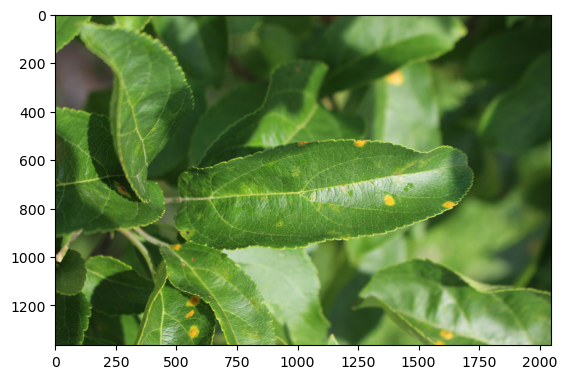

In [65]:
# opening the sample
image = Image.open(r'Original_dataset/Test_0.jpg')
plt.imshow(image)
plt.show()

In [66]:
# Preparing Dataset
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab', 'cranker'], dtype='object')


In [67]:
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab', 'cranker'], dtype='object')


In [68]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [69]:
DIR

'D:\\SIH\\Plant_Disease\\Plant_pathology\\Original_dataset'

In [70]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,cranker,label
0,Train_0,0,0,0,1,0,3
1,Train_1,0,1,0,0,0,1
2,Train_2,1,0,0,0,0,0
3,Train_3,0,0,1,0,0,2
4,Train_4,1,0,0,0,0,0


In [71]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [72]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label
    elif search("train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [73]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\scab')

            elif(img.split("_")[1].split(".")[0]) and label.item()==4:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\cranker')
        
        elif search("train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\scab')

            elif(img.split("_")[1].split(".")[0]) and label.item()==4:
                shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\cranker')
                
        elif search("Test",img):
            shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\test')
                
        elif search("test",img):
            shutil.copy(path,r'D:\SIH\Plant_Disease\Plant_pathology\Images\test')

In [74]:
train_dir=create_train_data()

  0%|          | 0/3281 [00:00<?, ?it/s]

100%|██████████| 3281/3281 [00:06<00:00, 522.70it/s]


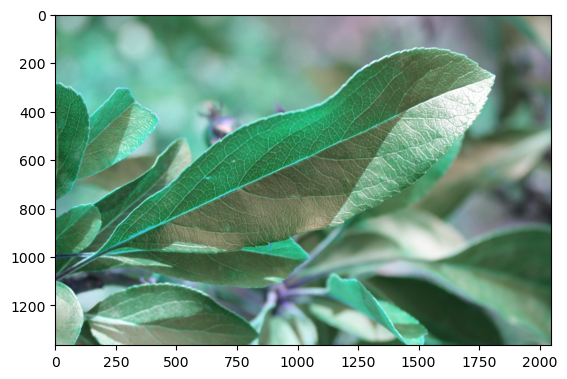

In [75]:
# Data Processing
Train_DIR = r'D:\SIH\Plant_Disease\Plant_pathology\Images\train'
Categories=['healthy','multiple_disease','rust','scab', 'cranker']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break


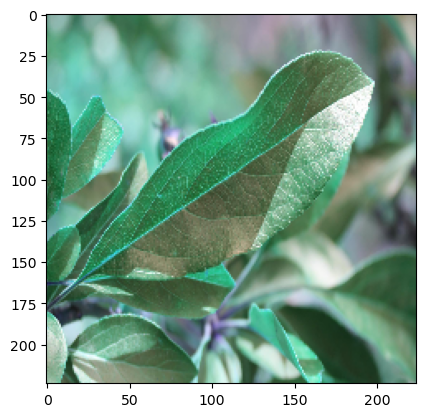

In [76]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [77]:
# Model Preparation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [78]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'D:\SIH\Plant_Disease\Plant_pathology\Images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'D:\SIH\Plant_Disease\Plant_pathology\Images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1035 images belonging to 5 classes.
Found 256 images belonging to 5 classes.


In [79]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 28, 28, 64)       

In [80]:
checkpoint=ModelCheckpoint(r'D:\SIH\Plant_Disease\Plant_pathology\citrus.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [81]:
# Model traning
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=35,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

C:\Users\heman\AppData\Local\Temp\ipykernel_8252\2491980975.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/35
64/64 [==============================] - ETA: 0s - loss: 1.2656 - accuracy: 0.3749
Epoch 1: val_loss improved from inf to 1.11571, saving model to D:\SIH\Plant_Disease\Plant_pathology\citrus.h5
64/64 [==============================] - 122s 2s/step - loss: 1.2656 - accuracy: 0.3749 - val_loss: 1.1157 - val_accuracy: 0.4297
Epoch 2/35


c:\Users\heman\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - ETA: 0s - loss: 1.0835 - accuracy: 0.4603
Epoch 2: val_loss improved from 1.11571 to 1.08486, saving model to D:\SIH\Plant_Disease\Plant_pathology\citrus.h5
64/64 [==============================] - 107s 2s/step - loss: 1.0835 - accuracy: 0.4603 - val_loss: 1.0849 - val_accuracy: 0.4453
Epoch 3/35
64/64 [==============================] - ETA: 0s - loss: 1.0541 - accuracy: 0.4760
Epoch 3: val_loss improved from 1.08486 to 1.05572, saving model to D:\SIH\Plant_Disease\Plant_pathology\citrus.h5
64/64 [==============================] - 105s 2s/step - loss: 1.0541 - accuracy: 0.4760 - val_loss: 1.0557 - val_accuracy: 0.5195
Epoch 4/35
64/64 [==============================] - ETA: 0s - loss: 1.0682 - accuracy: 0.4711
Epoch 4: val_loss improved from 1.05572 to 1.00242, saving model to D:\SIH\Plant_Disease\Plant_pathology\citrus.h5
64/64 [==============================] - 106s 2s/step - loss: 1.0682 - accuracy: 0.4711 - val_loss: 1.0024 - val_accuracy: 0

In [82]:
model.save('model.h5')

In [83]:
MAX_x = 4
MAX_y = 5

In [84]:
#Defining LVQ Algorithm
def lvq_train(X, y, a, b, max_ep, min_a, e):
    try:
        return max_ep
        
    except Exception as e:
        c, train_idx = np.unique(y, True)
        r = c
        W = X[train_idx].astype(np.float64)
        train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])
        X = train[:, 0]
        y = train[:, 1]
        ep = 0
    
        while ep < max_ep and a > min_a:
            for i, x in enumerate(X):
                d = [math.sqrt(sum((w - x) ** 2)) for w in W]
                min_1 = np.argmin(d)
    
                min_2 = 0
                dc = float(np.amin(d))
                dr = 0
                min_2 = d.index(sorted(d)[1])
                dr = float(d[min_2])
                if c[min_1] == y[i] and c[min_1] != r[min_2]:
                    W[min_1] = W[min_1] + a * (x - W[min_1])
    
                elif c[min_1] != r[min_2] and y[i] == r[min_2]:
                    if dc != 0 and dr != 0:
    
                        if min((dc/dr),(dr/dc)) > (1-e) / (1+e):
                            W[min_1] = W[min_1] - a * (x - W[min_1])
                            W[min_2] = W[min_2] + a * (x - W[min_2])
                elif c[min_1] == r[min_2] and y[i] == r[min_2]:
                    W[min_1] = W[min_1] + e * a * (x - W[min_1])
                    W[min_2] = W[min_2] + e * a * (x- W[min_2])
            a = a * b
            ep += 1
        return W, c


In [85]:
#Applying lvq algorithm
#For loop for repeating steps on all samples
x_train1 = []
for i in range(MAX_x): #Applying lvq on All the training and validation epochs
    for j in range(1,MAX_y):
        W = lvq_train(train_datagen, val_datagen, 0.2, 0.5, 100, 0.001, 0.3)
        x_train1= W
        
        

In [86]:
#Creating feature vector 
x_train1 = np.array(x_train1)
featuer_vector = x_train1 

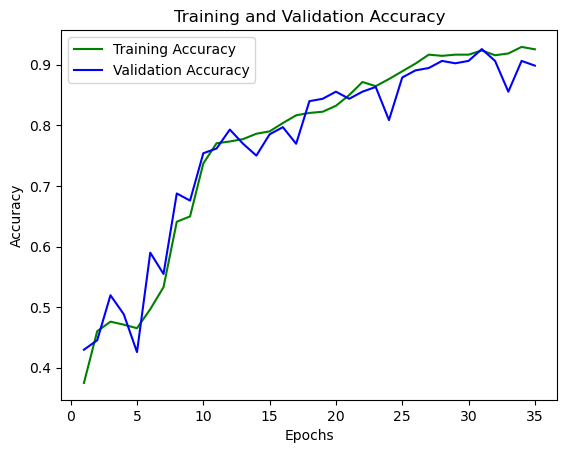

In [87]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,36)
featuer_vector = x_train1 
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

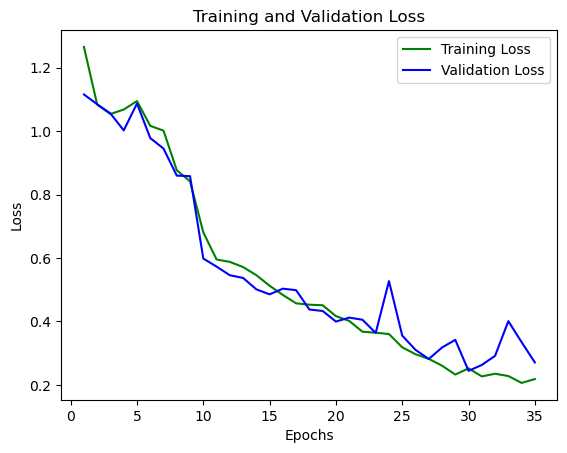

In [88]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,36)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 60ms/step
3


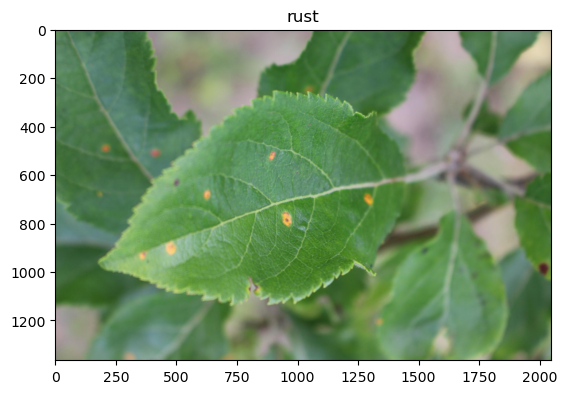

In [101]:
# Making a prediction
test_image=r'D:\SIH\Plant_Disease\Plant_pathology\Images\train\rust\train_764.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['cranker','healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()